- Download price data of single stock
- Compute daily and monthly returns
- Plot Returns Data
- More Interesting Plots
- Download price data of multiple stocks
- Compute correlations
- Compute Cumulative Returns

In [46]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [47]:
start_date = '2005-01-01'
end_date = '2023-02-01'

In [48]:
# Download Data
ticker = 'SPY'
df = yf.download(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [49]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,121.559998,121.760002,119.900002,120.300003,83.962402,55748000
2005-01-04,120.459999,120.540001,118.440002,118.830002,82.936462,69167600
2005-01-05,118.739998,119.250000,118.000000,118.010002,82.364143,65667300
2005-01-06,118.440002,119.150002,118.260002,118.610001,82.782875,47814700
2005-01-07,118.970001,119.230003,118.129997,118.440002,82.664268,55847700


In [50]:
# convert index to date
df.index = df.index.date

In [51]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
2005-01-03,121.559998,121.760002,119.900002,120.300003,83.962402,55748000
2005-01-04,120.459999,120.540001,118.440002,118.830002,82.936462,69167600
2005-01-05,118.739998,119.250000,118.000000,118.010002,82.364143,65667300
2005-01-06,118.440002,119.150002,118.260002,118.610001,82.782875,47814700
2005-01-07,118.970001,119.230003,118.129997,118.440002,82.664268,55847700


# Compute Daily Returns

In [52]:
df['Returns'] = df['Adj Close'].pct_change()
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,Returns
2005-01-03,121.559998,121.760002,119.900002,120.300003,83.962402,55748000,NaN
2005-01-04,120.459999,120.540001,118.440002,118.830002,82.936462,69167600,-0.012219
2005-01-05,118.739998,119.250000,118.000000,118.010002,82.364143,65667300,-0.006901


# Plot Return Distribution

Text(0.5, 1.0, 'Daily Returns Distribution')

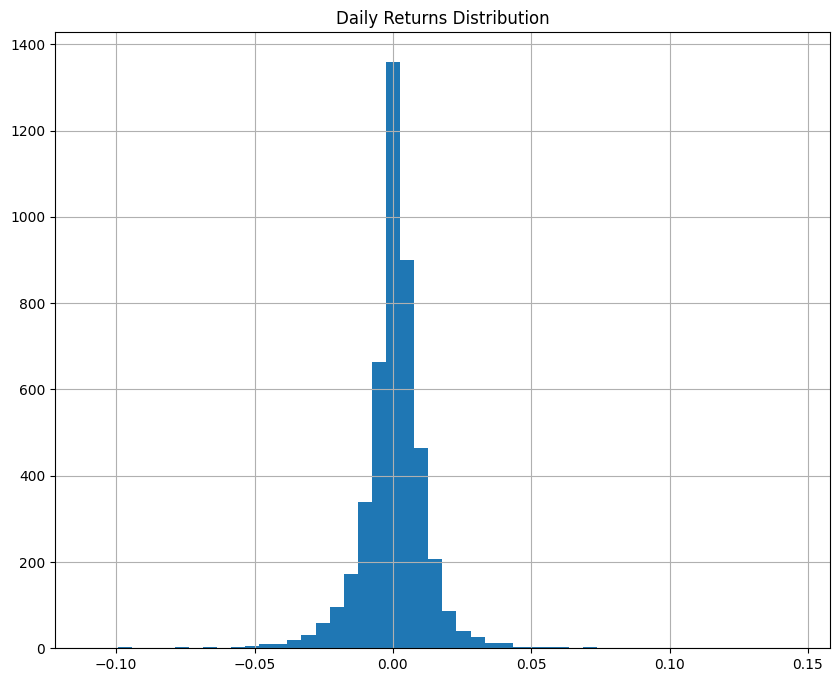

In [54]:
plt.figure(figsize = (10,8))
ax = df.Returns.hist(bins=50)
ax.set_title('Daily Returns Distribution')

# Alternative Method to Computing Returns

In [55]:
df['adj_close_lag'] = df['Adj Close'].shift(1)
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,Returns,adj_close_lag
2005-01-03,121.559998,121.760002,119.900002,120.300003,83.962402,55748000,NaN,NaN
2005-01-04,120.459999,120.540001,118.440002,118.830002,82.936462,69167600,-0.012219,83.962402
2005-01-05,118.739998,119.250000,118.000000,118.010002,82.364143,65667300,-0.006901,82.936462


In [57]:
df['Returns_2'] = ( df['Adj Close'] / df['adj_close_lag'] ) - 1

In [58]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,adj_close_lag,Returns_2
2005-01-03,121.559998,121.760002,119.900002,120.300003,83.962402,55748000,NaN,NaN,NaN
2005-01-04,120.459999,120.540001,118.440002,118.830002,82.936462,69167600,-0.012219,83.962402,-0.012219
2005-01-05,118.739998,119.250000,118.000000,118.010002,82.364143,65667300,-0.006901,82.936462,-0.006901
2005-01-06,118.440002,119.150002,118.260002,118.610001,82.782875,47814700,0.005084,82.364143,0.005084
2005-01-07,118.970001,119.230003,118.129997,118.440002,82.664268,55847700,-0.001433,82.782875,-0.001433


In [59]:
# Drop NaN Values
# Keep only Returns column as we don't need anything else for the next part
df = df.dropna()
df = df['Returns'].to_frame()
df.head()

,Returns
2005-01-04,-0.012219
2005-01-05,-0.006901
2005-01-06,0.005084
2005-01-07,-0.001433
2005-01-10,0.004728


# Monthly Returns

In [60]:
df.index = pd.to_datetime(df.index)

In [61]:
# Resample is similar to groupby method, performs calc on each item within every month
monthly_ret = df.Returns.resample('M').agg(lambda x: (1 + x).prod() - 1)

In [62]:
monthly_ret = monthly_ret.to_frame()

In [63]:
monthly_ret.head()

,Returns
2005-01-31,-0.017789
2005-02-28,0.020904
2005-03-31,-0.018292
2005-04-30,-0.018735
2005-05-31,0.032225


# Plot Returns Data
- Histogram
- Q-Q Plot
- Boxplot
- Time Series

Text(0.5, 1.0, 'Monthly Returns of the S&P 500 from 2006 to 2023')

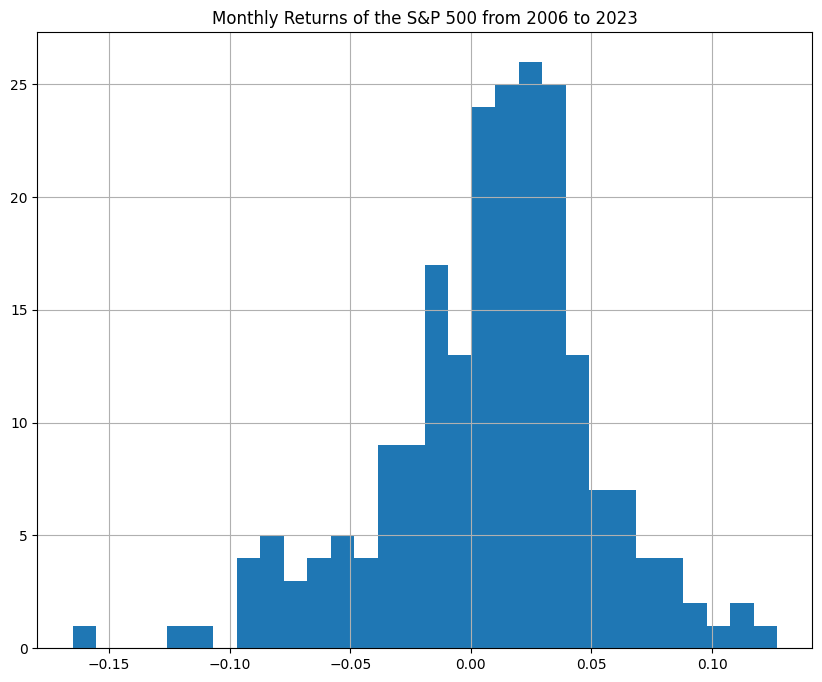

In [64]:
# Histogram
plt.figure(figsize = (10,8))
ax = monthly_ret.Returns.hist(bins = 30)
ax.set_title('Monthly Returns of the S&P 500 from 2006 to 2023')

In [65]:
# Average Monthly Returns
monthly_ret.Returns.mean()

0.008215425616695768

In [66]:
# Full Statistics
monthly_ret.describe()

,Returns
count,217.000000
mean,0.008215
std,0.043921
min,-0.165186
25%,-0.015706
50%,0.013371
75%,0.034737
max,0.126983


# Expected Returns

We can extrapolate a yearly return by annualizing the average monthly return

In [67]:
(1 + monthly_ret.Returns.mean()) ** 12 -1

0.1031639314218018

# Visualizing univariate distibutions

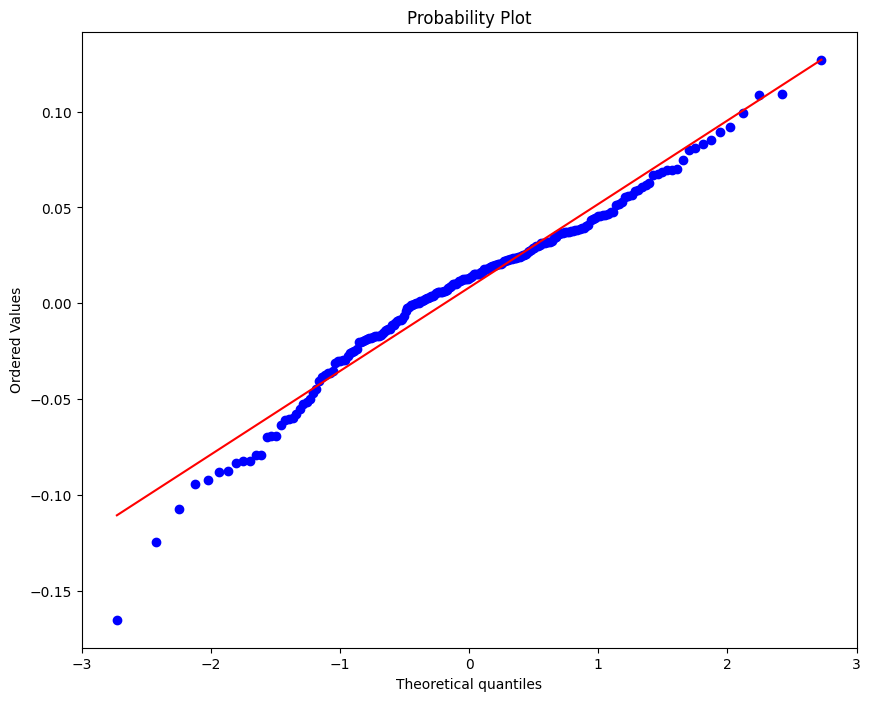

In [68]:
# Q-Q plot
import scipy.stats as stats
plt.figure(figsize = (10, 8))
stats.probplot(monthly_ret.Returns, dist = 'norm', plot = plt);

<Axes: >

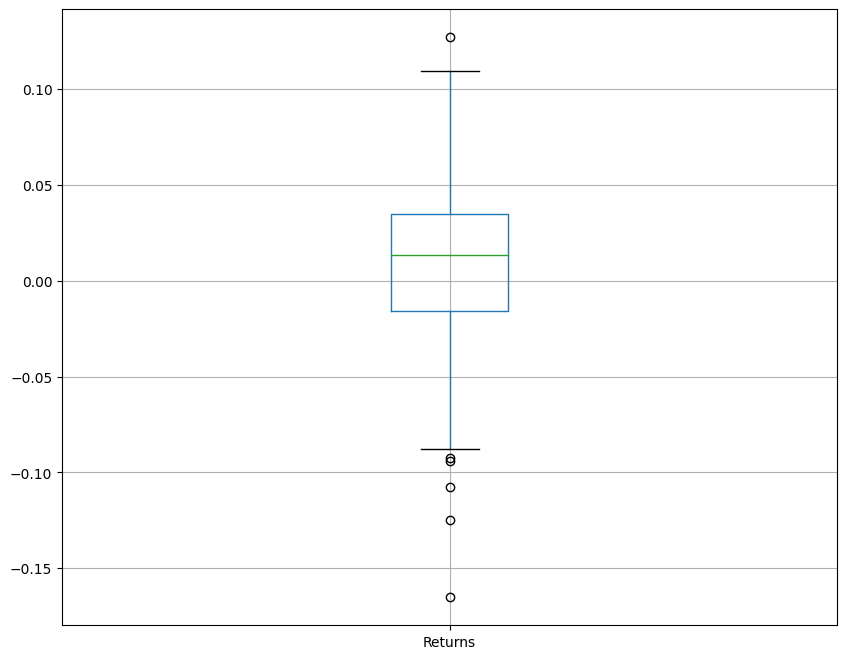

In [69]:
# Box Plot - Shows the quantiles
plt.figure(figsize = (10, 8))
monthly_ret.boxplot('Returns')

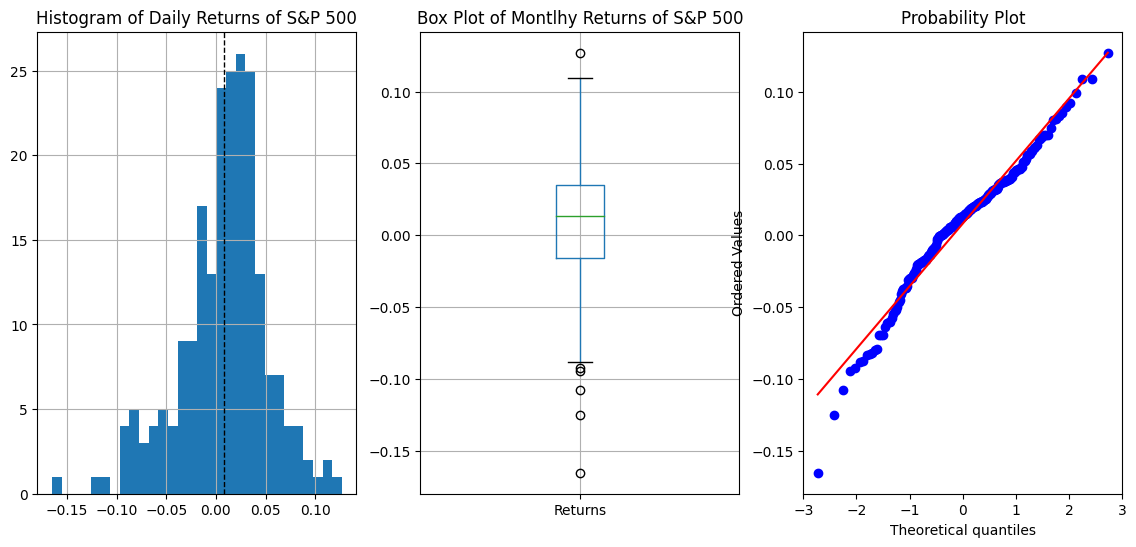

In [70]:
fig , (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
monthly_ret.Returns.hist(bins = 30, ax = ax1)
ax1.axvline(monthly_ret.Returns.mean(), color = 'k', linestyle = 'dashed', linewidth = 1);
ax1.set_title('Histogram of Daily Returns of S&P 500')

monthly_ret.boxplot('Returns', ax = ax2)
stats.probplot(monthly_ret.Returns, dist = 'norm', plot= ax3);
ax2.set_title('Box Plot of Montlhy Returns of S&P 500')
fig.set_size_inches(14,6)

# Multiple Stock Data

In [72]:
# Ticker list to download
tickers = 'SPY QQQ TLT AAPL MSFT GOOG AMZN NFLX NVDA MA ADBE'

# Download data from Yahoo-Finance
data = yf.download(
    tickers = tickers,
    period = 'max',
    interval = "1d",
    ignore_tz=True,
    auto_adjust=True, # Adjust all fields by splits and dividends
    #group_by='ticker',
)

[*********************100%%**********************]  11 of 11 completed


In [73]:
data.head()

Close                                            ... Volume  \
                AAPL ADBE AMZN GOOG  MA MSFT NFLX NVDA QQQ SPY  ...   ADBE   
Date                                                            ...          
1980-12-12  0.099450  NaN  NaN  NaN NaN  NaN  NaN  NaN NaN NaN  ...    NaN   
1980-12-15  0.094261  NaN  NaN  NaN NaN  NaN  NaN  NaN NaN NaN  ...    NaN   
1980-12-16  0.087343  NaN  NaN  NaN NaN  NaN  NaN  NaN NaN NaN  ...    NaN   
1980-12-17  0.089504  NaN  NaN  NaN NaN  NaN  NaN  NaN NaN NaN  ...    NaN   
1980-12-18  0.092099  NaN  NaN  NaN NaN  NaN  NaN  NaN NaN NaN  ...    NaN   

                                                     
           AMZN GOOG  MA MSFT NFLX NVDA QQQ SPY TLT  
Date                                                 
1980-12-12  NaN  NaN NaN  NaN  NaN  NaN NaN NaN NaN  
1980-12-15  NaN  NaN NaN  NaN  NaN  NaN NaN NaN NaN  
1980-12-16  NaN  NaN NaN  NaN  NaN  NaN NaN NaN NaN  
1980-12-17  NaN  NaN NaN  NaN  NaN  NaN NaN NaN NaN  
1980-12-18  NaN  NaN NaN  NaN  NaN  NaN NaN NaN NaN  

[5 rows x 55 columns]

In [75]:
df = data['Close'].copy()

In [76]:
df.head()

,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,
1980-12-12,0.099450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.094261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.087343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.089504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.092099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df = df.dropna()
df.head()

,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,
2006-05-25,1.950110,29.139999,1.7815,9.538996,4.228490,16.957304,4.107143,3.657472,34.170063,91.081161,49.899635
2006-05-26,1.926466,28.980000,1.8035,9.498149,4.130133,16.943008,4.118571,3.665117,34.282921,91.544655,49.864124
2006-05-30,1.855833,28.350000,1.7320,9.263777,4.044644,16.535872,3.928571,3.512211,33.544983,89.918839,49.840443
2006-05-31,1.811878,28.629999,1.7305,9.260788,4.131051,16.178722,3.955714,3.513741,33.701260,90.924286,49.544369
2006-06-01,1.884632,28.719999,1.7535,9.529780,4.367295,16.300161,4.072857,3.697227,34.499950,91.794235,49.765533


In [78]:
# Start from 2006-06-01 to get a complete month
df = df["2006-06-01":]
df.head()

,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,
2006-06-01,1.884632,28.719999,1.7535,9.529780,4.367295,16.300161,4.072857,3.697227,34.499950,91.794235,49.765533
2006-06-02,1.869172,29.000000,1.7380,9.450577,4.319496,16.257298,3.992857,3.643710,34.413147,91.986771,50.407608
2006-06-05,1.818850,29.469999,1.6745,9.326044,4.518052,16.071583,3.897143,3.490806,33.666531,90.646172,50.342182
2006-06-06,1.810362,29.840000,1.6705,9.713342,4.439916,15.807287,3.841429,3.397533,33.640469,90.425110,50.579933
2006-06-07,1.775198,28.820000,1.6885,9.626667,4.375569,15.743010,3.771429,3.336373,33.388725,89.747688,50.591850


In [79]:
# Compute simple daily returns
df = df.pct_change()
df.head()

,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,
2006-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-02,-0.008203,0.009749,-0.008839,-0.008311,-0.010945,-0.002630,-0.019642,-0.014475,-0.002516,0.002097,0.012902
2006-06-05,-0.026922,0.016207,-0.036536,-0.013177,0.045967,-0.011423,-0.023971,-0.041964,-0.021696,-0.014574,-0.001298
2006-06-06,-0.004667,0.012555,-0.002389,0.041529,-0.017294,-0.016445,-0.014296,-0.026720,-0.000774,-0.002439,0.004723
2006-06-07,-0.019424,-0.034182,0.010775,-0.008923,-0.014493,-0.004066,-0.018222,-0.018001,-0.007483,-0.007492,0.000236


In [80]:
# Fill the first row with zero
df = df.fillna(0)

In [81]:
df.head()

,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,
2006-06-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-06-02,-0.008203,0.009749,-0.008839,-0.008311,-0.010945,-0.002630,-0.019642,-0.014475,-0.002516,0.002097,0.012902
2006-06-05,-0.026922,0.016207,-0.036536,-0.013177,0.045967,-0.011423,-0.023971,-0.041964,-0.021696,-0.014574,-0.001298
2006-06-06,-0.004667,0.012555,-0.002389,0.041529,-0.017294,-0.016445,-0.014296,-0.026720,-0.000774,-0.002439,0.004723
2006-06-07,-0.019424,-0.034182,0.010775,-0.008923,-0.014493,-0.004066,-0.018222,-0.018001,-0.007483,-0.007492,0.000236


## Some context of the data

Benchmarks:
- SPY: S&P 500
- QQQ: Nasdaq-100
- TLT: Long term bond US treasury ETF

In [82]:
benchmarks = ['SPY', "QQQ", "TLT"]
stocks = ['AAPL', 'ADBE', 'AMZN', 'GOOG', 'MA', 'MSFT', 'NFLX', 'NVDA']

Monthly returns

In [83]:
df.index = pd.to_datetime(df.index)
monthly_ret = df.resample('M').agg(lambda x: (1 + x).prod() - 1)
monthly_ret.head()

,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,
2006-06-30,-0.078817,0.057103,0.102937,0.095944,0.010314,0.021034,-0.045598,-0.119520,-0.023752,-0.006894,0.007287
2006-07-31,0.186661,-0.060935,-0.304809,-0.078053,-0.044375,0.032617,-0.239618,0.039925,-0.043075,0.004478,0.021633
2006-08-31,-0.001619,0.137846,0.146523,-0.020874,0.218661,0.072097,-0.032383,0.314815,0.047708,0.021823,0.030561
2006-09-30,0.134562,0.154747,0.041842,0.061739,0.258497,0.064202,0.137862,0.016489,0.046396,0.027002,0.019150
2006-10-31,0.053260,0.021089,0.185866,0.185345,0.054668,0.049726,0.214223,0.178438,0.047478,0.031516,0.008467


### Correlation Matrix

- Most stocks are correlated
- Stocks and TLT have a negative correlation

In [84]:
monthly_ret.corr()

,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
AAPL,1.000000,0.523680,0.431259,0.518128,0.526256,0.532382,0.185854,0.478278,0.757609,0.617294,-0.074392
ADBE,0.523680,1.000000,0.450181,0.476722,0.436256,0.612869,0.308397,0.550697,0.763980,0.727437,-0.072424
AMZN,0.431259,0.450181,1.000000,0.530353,0.381004,0.448653,0.380167,0.398713,0.653324,0.511282,0.014272
GOOG,0.518128,0.476722,0.530353,1.000000,0.461198,0.576705,0.194463,0.420989,0.711650,0.614921,-0.124028
MA,0.526256,0.436256,0.381004,0.461198,1.000000,0.410765,0.143754,0.298805,0.561753,0.548199,-0.096614
MSFT,0.532382,0.612869,0.448653,0.576705,0.410765,1.000000,0.272307,0.474047,0.724721,0.662078,-0.069286
NFLX,0.185854,0.308397,0.380167,0.194463,0.143754,0.272307,1.000000,0.244771,0.378282,0.297220,-0.040577
NVDA,0.478278,0.550697,0.398713,0.420989,0.298805,0.474047,0.244771,1.000000,0.647296,0.542039,-0.063796
QQQ,0.757609,0.763980,0.653324,0.711650,0.561753,0.724721,0.378282,0.647296,1.000000,0.912484,-0.107610
SPY,0.617294,0.727437,0.511282,0.614921,0.548199,0.662078,0.297220,0.542039,0.912484,1.000000,-0.151706


- The negative relation between stocks and bonds is clearer in moments of crisis.
- They help diversify the portfolio risk
- It doesn't ALWAYS work! Each crisis is different

In [85]:
monthly_ret['2007-09-01':'2009-08-30'].corr()

,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
AAPL,1.000000,0.689012,0.571854,0.790233,0.758569,0.615086,0.271066,0.655469,0.863523,0.672896,-0.333874
ADBE,0.689012,1.000000,0.506074,0.496772,0.505410,0.681439,0.368625,0.617538,0.881313,0.882431,-0.188767
AMZN,0.571854,0.506074,1.000000,0.624194,0.453551,0.397840,0.460599,0.610013,0.701265,0.529000,-0.214536
GOOG,0.790233,0.496772,0.624194,1.000000,0.691129,0.565948,0.246605,0.585218,0.747883,0.570254,-0.348369
MA,0.758569,0.505410,0.453551,0.691129,1.000000,0.503501,0.221978,0.530101,0.682184,0.529317,-0.058834
MSFT,0.615086,0.681439,0.397840,0.565948,0.503501,1.000000,0.276325,0.514396,0.668385,0.623965,0.004373
NFLX,0.271066,0.368625,0.460599,0.246605,0.221978,0.276325,1.000000,0.243126,0.434236,0.333692,0.017851
NVDA,0.655469,0.617538,0.610013,0.585218,0.530101,0.514396,0.243126,1.000000,0.702848,0.590179,-0.118563
QQQ,0.863523,0.881313,0.701265,0.747883,0.682184,0.668385,0.434236,0.702848,1.000000,0.911373,-0.225495
SPY,0.672896,0.882431,0.529000,0.570254,0.529317,0.623965,0.333692,0.590179,0.911373,1.000000,-0.046012


# Compute Cumulative Returns

In [86]:
ret_cumulative = (1 + monthly_ret).cumprod()

In [87]:
ret_cumulative

,AAPL,ADBE,AMZN,GOOG,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,
2006-06-30,0.921183,1.057103,1.102937,1.095944,1.010314,1.021034,0.954402,0.880480,0.976248,0.993106,1.007287
2006-07-31,1.093132,0.992688,0.766752,1.010402,0.965481,1.054337,0.725710,0.915633,0.934197,0.997554,1.029077
2006-08-31,1.091362,1.129526,0.879099,0.989310,1.176595,1.130352,0.702210,1.203888,0.978766,1.019323,1.060527
2006-09-30,1.238218,1.304318,0.915882,1.050389,1.480741,1.202923,0.799018,1.223739,1.024176,1.046846,1.080836
2006-10-31,1.304165,1.331825,1.086114,1.245073,1.561691,1.262740,0.970186,1.442100,1.072803,1.079839,1.089987
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30,102.783160,17.026114,74.342744,12.693892,89.795529,20.847679,108.152582,114.406065,10.692364,4.812088,2.044616
2023-07-31,104.097292,19.017061,76.236096,13.967793,90.149458,20.564845,107.779382,126.378928,11.105100,4.969603,1.992595
2023-08-31,99.685248,19.475628,78.705444,14.412715,94.347351,20.107777,106.480538,133.480958,10.940410,4.888837,1.929987


In [88]:
import plotly.express as px

In [90]:
px.line(ret_cumulative[['SPY', "QQQ", "TLT"]], log_y=False)

In [91]:
px.line(ret_cumulative[['SPY', "QQQ", "TLT"]], log_y=False)

In [92]:
px.line(ret_cumulative[stocks], log_y=False)